# Data analysis & pre-processing
The given data has the following histograms:

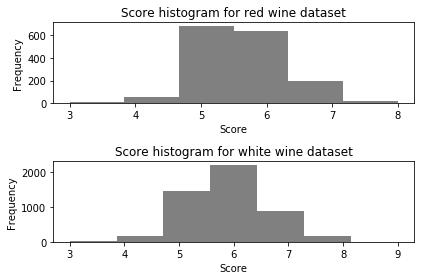

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

datdir = "datasets"
red_dat = pd.read_csv( "./" + datdir + "/winequality-red.csv",';')
white_dat = pd.read_csv( "./" + datdir + "/winequality-white.csv", ';')

ts_r = red_dat['quality']
ts_w = white_dat['quality']

plt.subplot(211)
ts_r.plot.hist(color='grey',bins=6)
plt.xlabel("Score")
plt.title("Score histogram for red wine dataset")

plt.subplot(212)
ts_w.plot.hist(color='grey',bins=7)
plt.xlabel("Score")
plt.title("Score histogram for white wine dataset")

plt.tight_layout()
plt.show()

Looking at the figure above, it can be seen that both datasets follow the normal distribution quite closely. Also, scores 1~2 are not present in either of the datasets, while score 9 is not present from the white wine dataset only. This gives motivation to combine the datasets together for both red and white wine, and generalize for the quality of both red and white wines.

The ```get_data()``` function in ```data_utils.py``` concatenates these two datasets, yielding us a final dataset:


In [28]:
from src.utils.data_utils import get_data


concat_data = get_data(datdir)
concat_data.describe() #diplaying statistics for new data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The new hisogram for the combined dataset is better, covering a wider range of qualities in more quantities.

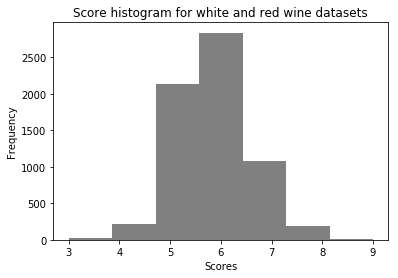

In [16]:
plt.figure()
concat_data['quality'].plot.hist(color='grey',bins=7)
plt.xlabel("Scores")
plt.title("Score histogram for white and red wine datasets")
plt.show()

Scores 1,2 are still not present in the dataset. This makes it difficult to learn the correct answers for future wine datasets that the machine will predict on for these scores, as there is no examples on these scores. This gives motivation to bag the dataset into 5 categories: ```{ 'worst':0, 'worse':1, 'average':2, 'better':3, 'best':4 }```. The median score, 6 will be the new centered 'average' score. Score 7 will be 'better' and anything greater will be considered best, and similiarly for the lower scores.($score < 5 \rightarrow 'worst' ; score = 6 \rightarrow 'better'$) This will aid both the problem of non-present examples and unbalance in the two extremes of the datasets, as it essentially up-sampling the minority classes by combining them.

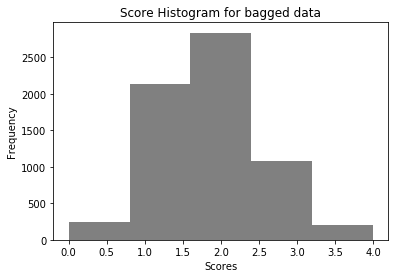

In [25]:
recode = {3:0, 4:0, 5:1, 6:2, 7:3, 8:4,9:4}
#recode = {3:0,4:0,5:0,6:0,7:1,8:1,9:1}
concat_data['quality_c'] = concat_data['quality'].map(recode)

plt.figure()
concat_data['quality_c'].astype(int).plot.hist(color='grey',bins=5)
plt.xlabel("Scores")
plt.title("Score Histogram for bagged data")
plt.show()

The '''classify.py''' module tests a variety of predictors against this new dataset and returns their performance metrics:

Linear Regression:

-Test Set Metrics:

Mean Absolute Error(MAE): 0.553606490936
Mean squared error(MSE): 0.5036293567
Test set score(sklearn): 0.296092542509
SVR :

-Test Set Metrics:

Mean Absolute Error(MAE): 0.504958515883
Mean squared error(MSE): 0.437643015769
Test set score(sklearn): 0.388319647335
NNs :

-Test Set Metrics:

Mean Absolute Error(MAE): 0.510979315002
Mean squared error(MSE): 0.422540363375
Test set score(sklearn): 0.409428165944
Best params: {'hidden_layer_sizes': (90, 90)}
SVC :

-Test Set Metrics:



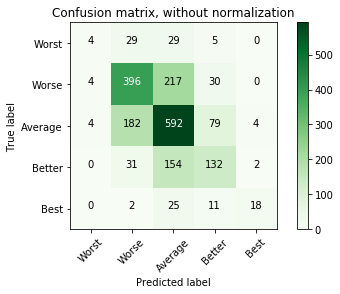

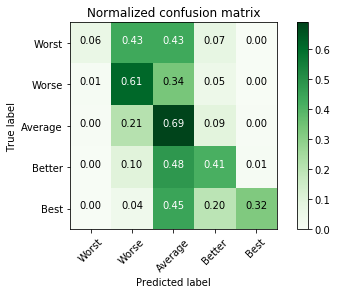

------------------------------
Classification Report(Test set):

              precision    recall  f1-score   support

      Worst       0.33      0.06      0.10        67
      Worse       0.62      0.61      0.62       647
    Average       0.58      0.69      0.63       861
     Better       0.51      0.41      0.46       319
       Best       0.75      0.32      0.45        56

avg / total       0.58      0.59      0.57      1950

SVC(OneVsRest):

-Test Set Metrics:



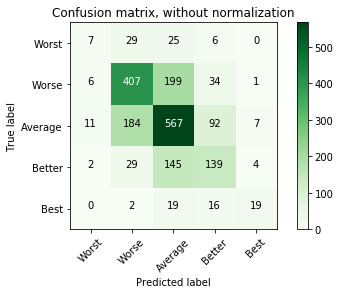

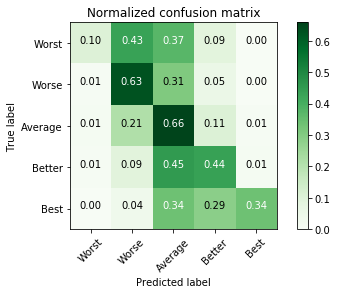

------------------------------
Classification Report(Test set):

              precision    recall  f1-score   support

      Worst       0.27      0.10      0.15        67
      Worse       0.63      0.63      0.63       647
    Average       0.59      0.66      0.62       861
     Better       0.48      0.44      0.46       319
       Best       0.61      0.34      0.44        56

avg / total       0.58      0.58      0.58      1950

NNs :

-Test Set Metrics:



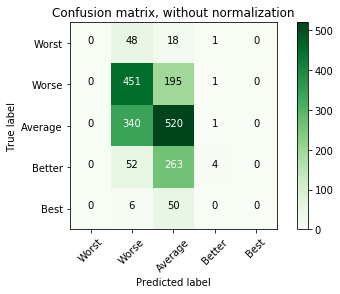

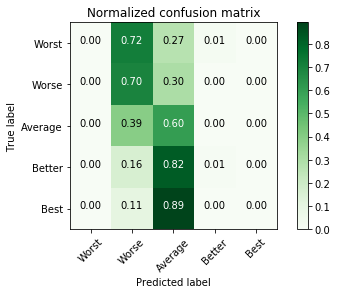

------------------------------
Classification Report(Test set):

              precision    recall  f1-score   support

      Worst       0.00      0.00      0.00        67
      Worse       0.50      0.70      0.58       647
    Average       0.50      0.60      0.55       861
     Better       0.57      0.01      0.02       319
       Best       0.00      0.00      0.00        56

avg / total       0.48      0.50      0.44      1950

Best params: {'hidden_layer_sizes': (70, 70)}


C:\Users\annoc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
from src.classify import classify

classify(datdir,False)